In [92]:
result_dir = "output_weak_agra-ablation"

In [93]:
datasets = [
    "agnews",
    # "bank-marketing",
    "basketball",
    "bioresponse",
    "census",
    "commercial",
    "imdb",
    "mushroom",
    "phishing",
    "sms",
    "spambase",
    "tennis",
    "trec",
    "yelp",
    "yoruba",
    "youtube",
    "hausa",
    "imdb136",
    "amazon",
    "professor_teacher",
]

In [94]:
import os
import pandas as pd
import numpy as np

methods = os.listdir(result_dir)
# methods = filter(lambda method: (method != "sgb_aum") and (method != "sgb_forget") and (method != "gold"), methods)
results = []
for method in methods:
    for dataset in datasets:
        with open(os.path.join(result_dir, method, f"{dataset}.json")) as f:
            results.append(pd.read_json(f, orient="index").transpose())

results = pd.concat(results)

In [95]:
results["class_ratio"] = results["class_distribution"].apply(min) / results[
    "class_distribution"
].apply(max)

results["noisy_class_ratio"] = results["noisy_class_distribution"].apply(min) / results[
    "noisy_class_distribution"
].apply(max)

results["classes"] = np.where(
    results["class_distribution"].map(lambda d: len(d)) > 2,
    "multiclass",
    "binary",
)

results["accuracy"] = results["accuracy"].astype(float)
results["balanced_accuracy"] = results["balanced_accuracy"].astype(float)
results["log_loss"] = results["log_loss"].astype(float)

In [96]:
detectors = results["detector_name"].unique().tolist()
datasets = results["dataset_name"].unique().tolist()

In [97]:
table = results.pivot(
    index="dataset_name",
    columns="detector_name",
    values="balanced_accuracy",
)
# table.loc["mean"] = table.mean()
# table.loc["median"] = table.median()
table = table.round(4)*100

table.to_latex("table.tex")
table

detector_name,agra,gold,independent_agra,loss,none,oob_agra,progressive_agra,silver
dataset_name,,,,,,,,
agnews,78.15,85.09,78.06,75.89,71.66,77.26,78.33,82.68
amazon,69.25,92.61,65.31,58.90,58.90,65.33,68.21,86.07
basketball,77.79,89.79,61.15,49.82,53.18,50.00,49.50,87.57
bioresponse,58.00,77.18,64.26,58.17,58.17,60.46,60.71,65.48
census,71.31,77.42,63.61,55.69,55.69,66.05,70.36,63.47
commercial,53.54,92.71,91.10,91.36,91.88,92.40,82.19,92.55
hausa,33.94,74.78,34.88,33.67,33.67,33.67,34.41,36.54
imdb,71.32,85.04,71.00,70.92,70.92,71.12,71.00,71.16
imdb136,67.47,85.18,68.31,67.17,67.17,68.30,69.68,78.01


In [98]:
(-table).rank(axis=1)

detector_name,agra,gold,independent_agra,loss,none,oob_agra,progressive_agra,silver
dataset_name,,,,,,,,
agnews,4.0,1.0,5.0,7.0,8.0,6.0,3.0,2.0
amazon,3.0,1.0,6.0,7.5,7.5,5.0,4.0,2.0
basketball,3.0,1.0,4.0,7.0,5.0,6.0,8.0,2.0
bioresponse,8.0,1.0,3.0,6.5,6.5,5.0,4.0,2.0
census,2.0,1.0,5.0,7.5,7.5,4.0,3.0,6.0
commercial,8.0,1.0,6.0,5.0,4.0,3.0,7.0,2.0
hausa,5.0,1.0,3.0,7.0,7.0,7.0,4.0,2.0
imdb,2.0,1.0,5.5,7.5,7.5,4.0,5.5,3.0
imdb136,6.0,1.0,4.0,7.5,7.5,5.0,3.0,2.0


In [99]:
from critdd import Diagram
from itertools import starmap

diagram = Diagram(
    table.to_numpy(),
    treatment_names=list(
        starmap(
            lambda column, perf: f"{column} {round(perf,2)}",
            zip(table.columns, table.median()),
        )
    ),
    maximize_outcome=True,
)
diagram.to_file("critdd.pdf")

/home/fgmc9692/.local/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


/home/fgmc9692/.local/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/fgmc9692/.local/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


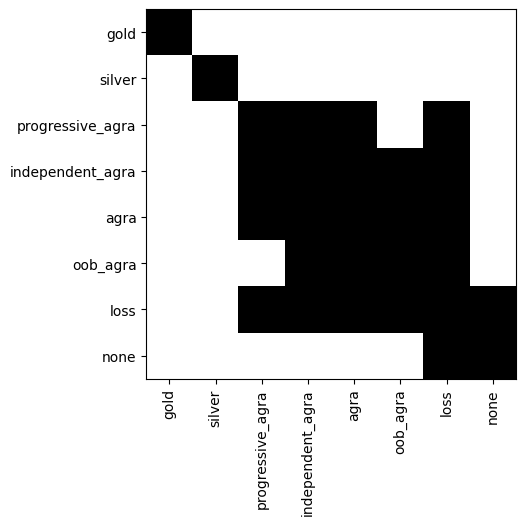

In [100]:
from itertools import product
from scipy.stats import wilcoxon, rankdata
import matplotlib.pyplot as plt

names = np.asarray(sorted(results["detector_name"].unique()))
competitors = (
    results.groupby("detector_name", sort="dataset_name")["balanced_accuracy"]
    .agg(list)
    .map(np.array)
    .tolist()
)
competitors = np.asarray(competitors)
avg_ranks = np.mean(rankdata(competitors, axis=0), axis=1)
order = np.flip(np.argsort(avg_ranks))
competitors = competitors[order]
names = names[order]
n_competitors = len(competitors)
matrix = np.empty((n_competitors, n_competitors), dtype=bool)
for (i1, c1), (i2, c2) in product(enumerate(competitors), repeat=2):
    if not np.all(np.equal(c1, c2)):
        s, p = wilcoxon(c1, c2)
        matrix[i1, i2] = p < 0.05
    else:
        matrix[i1, i2] = False
plt.imshow(~matrix, cmap="Greys")
plt.xticks(range(n_competitors), names, rotation="vertical")
plt.yticks(range(n_competitors), names)
plt.savefig("wilcoxon.pdf", bbox_inches='tight')

In [ ]:
# rajouter plot performance finale vs qualité du ranking

# est-ce que les detecteurs qui filtrent plus sont meilleurs ?

# est-ce que tuner le threshold d'agra reduit ses perfs ?

# relancer le bench en annexe avec modele final en model final

# sanity check : detector avec trust_scores random

# les trois points clés
# - ranking quality décorélé de la perf finale
# - y a toujours des approches meilleures que none mais différent selon le type de bruit => difficulté à trouver un champion car le type de bruit de la vrai vie est incconu
# - grosse limite du bench : jeu de validation clean nécessaire : (plot sms avec validation noisy + bench validation noisy) à comparer à du biquality (bonus algo biquality lancé sur le bench)
# - amélioration d'agra sur le ncar